### Outline

1. Import libraries
2. Import data (pandas)
3. Work with data
 * Normalise
 * See if we need to use all the collumns
4. Define model (e.g. Linear Regression)
4. Define Loss and gradient
5. Train
6. Test on val
7. Improve

*Tip*
- you could implement k_fold validation **if you guys want**

In [ ]:
from typing import Tuple, List
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import helpers

import plotly.graph_objects as go


In [ ]:
df_train = pd.read_csv('Data/train_set.csv')
df_val = pd.read_csv('Data/val_set.csv')
df_test = pd.read_csv('Data/test_set.csv')

# Separation so lil brain understands data
target = ['sat1_col']
non_period_features = ['sa_avg', 'da5_75', 'da5_95', 'fiv3', 'sa_ratio']
raw_period_features = [e for e in df_train.columns if e not in non_period_features]

# Data separation
#X_train = df_train[["1.3"] + non_period_features].to_numpy()
#y_train = df_train[target].to_numpy()
X_train = df_train[["1.3"] + non_period_features + target].to_numpy()
X_val = df_val[["1.3"] + non_period_features + target].to_numpy()
X_test = df_test[["1.3"] + non_period_features].to_numpy()

# Data visualisation
print("Non period features:", non_period_features)
print("Raw period features", raw_period_features)
df_train[["1.3"] + non_period_features + target].head(15)


Non period features: ['sa_avg', 'da5_75', 'da5_95', 'fiv3', 'sa_ratio']
Raw period features ['0.01', '0.02', '0.022', '0.025', '0.029', '0.03', '0.032', '0.035', '0.036', '0.04', '0.042', '0.044', '0.045', '0.046', '0.048', '0.05', '0.055', '0.06', '0.065', '0.067', '0.07', '0.075', '0.08', '0.085', '0.09', '0.095', '0.1', '0.11', '0.12', '0.13', '0.133', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19', '0.2', '0.22', '0.24', '0.25', '0.26', '0.28', '0.29', '0.3', '0.32', '0.34', '0.35', '0.36', '0.38', '0.4', '0.42', '0.44', '0.45', '0.46', '0.48', '0.5', '0.55', '0.6', '0.65', '0.667', '0.7', '0.75', '0.8', '0.85', '0.9', '0.95', '1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2.0', '2.2', '2.4', '2.5', '2.6', '2.8', '3.0', '3.2', '3.4', '3.5', '3.6', '3.8', '4.0', '4.2', '4.4', '4.6', '4.8', '5.0', '5.5', '6.0', '6.5', '7.0', '7.5', '8.0', '8.5', '9.0', '9.5', '10.0', 'sat1_col']


,1.3,sa_avg,da5_75,da5_95,fiv3,sa_ratio,sat1_col
0,0.008996,0.010809,14.484,21.416,2.881797,0.832237,0.78
1,0.029853,0.031044,14.430,18.270,7.642059,0.961638,1.96
2,0.171052,0.098425,16.700,35.105,42.218868,1.737888,1.39
3,0.010175,0.010169,7.320,17.370,2.599605,1.000551,1.97
4,0.051253,0.037375,28.005,41.635,11.434507,1.371310,1.43
5,0.020927,0.019095,5.360,19.400,4.703392,1.095944,1.18
6,0.001711,0.002749,5.980,12.485,0.344223,0.622299,1.57
7,0.004335,0.003773,31.900,44.325,0.693109,1.148810,1.45
8,0.028434,0.046312,12.490,20.285,24.317633,0.613971,0.64
9,0.005353,0.005589,10.395,17.335,0.979041,0.957757,0.93


In [ ]:
# X_train
y_train = X_train[:,-1]
X_train = np.delete(X_train, -1, axis=1)
print('Actual Training set shape:')
print(X_train.shape)
print('Training answer shape:')
print(y_train.shape)

# X_val
y_val = X_val[:,-1]
X_val = np.delete(X_val, -1, axis=1)
print('Validation set shape:')
print(X_val.shape)
print('Validation answer shape:')
print(y_val.shape)

Actual Training set shape:
(12646, 6)
Training answer shape:
(12646,)
Validation set shape:
(1500, 6)
Validation answer shape:
(1500,)


### Normalise

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

def normalise(X, mean, std):
    return (X-mean)/std

X_train = normalise(X_train, mean, std)
X_val = normalise(X_val, mean, std)
X_test = normalise(X_test, mean, std)

## Adding constant

In [ ]:
def add_constant(X: np.ndarray) -> np.ndarray:
    X_with_offset = np.insert(X, 0, 1, axis=1)

    return X_with_offset

X_train = add_constant(X_train)
X_val = add_constant(X_val)


In [ ]:
print('Training set features:')
print(f'X_train: \n {X_train[:10]}')

print('\nTraining set labels:')
print(f'y_train: \n {y_train[:10]}')


print('Actual Training set shape:')
print(X_train.shape)

print('Training answer shape:')
print(y_train.shape)

# y_val
print('Validation set shape:')
print(X_val.shape)

print('Validation answer shape:')
print(y_val.shape)

Training set features:
X_train: 
 [[ 1.         -0.40479176 -0.41729232 -0.12981772 -0.37117896 -0.40883928
  -0.44135078]
 [ 1.         -0.19453931 -0.17709485 -0.13332457 -0.48275726 -0.2503362
  -0.13648569]
 [ 1.          1.22884046  0.62276833  0.01409295  0.11432497  0.90097239
   1.69233555]
 [ 1.         -0.39290491 -0.42488665 -0.59505963 -0.51467731 -0.41823549
  -0.04480963]
 [ 1.          0.02118684 -0.10193634  0.74825819  0.34592265 -0.12405858
   0.82868801]
 [ 1.         -0.28451741 -0.31893393 -0.72234524 -0.44267987 -0.34818539
   0.17993413]
 [ 1.         -0.47823001 -0.5129723  -0.68208143 -0.68793224 -0.49333323
  -0.9359588 ]
 [ 1.         -0.45177716 -0.50081138  1.00120587  0.44132813 -0.48171633
   0.3044849 ]
 [ 1.         -0.20883903  0.00414925 -0.25931135 -0.41129182  0.30491258
  -0.95557934]
 [ 1.         -0.44151221 -0.47925592 -0.39536409 -0.51591864 -0.4721956
  -0.14563049]]

Training set labels:
y_train: 
 [0.78 1.96 1.39 1.97 1.43 1.18 1.57 1.45 0.6

## MSE Loss Function

In [ ]:
def mse_loss(X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
    
    N = y.shape[0]
    y_hat = X @ w
    loss = (1/ N) * ((y_hat - y).T @ (y_hat - y))
    return loss


In [ ]:
zero_weights = np.zeros(X_train.shape[1])
print(zero_weights.shape)

(7,)


In [ ]:
train_loss = mse_loss(X_train, y_train, zero_weights)
val_loss = mse_loss(X_val, y_val, zero_weights)
print(f"Train loss: {train_loss:.5f}")
print(f"Val loss: {val_loss:.5f}")

Train loss: 2.01835
Val loss: 1.93480


### Gradient Descent

In [ ]:
def mse_gradient(X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:

    N = y.shape[0]
    grad = (2/N) * X.T @ (X @ w - y)

    return grad

In [ ]:
def gradient_descent(X: np.ndarray, y: np.ndarray, w: np.ndarray, alpha: float, max_iters: int) -> (np.ndarray, np.ndarray):
  
    losses = np.zeros(max_iters)
    
    for n_iter in range(max_iters):
        w = w - alpha * mse_gradient(X, y, w)   
        loss = mse_loss(X, y, w)
        
        losses[n_iter] = loss
        
        if n_iter % (max_iters / 20) == 0:
            if w.shape[0] == 7: 
                print(f"Iteration {n_iter}: loss={loss:.5f}, w0={w[0]:.3f}, w1={w[1]:.3f}, w2={w[2]:.3f}, w3={w[3]:.3f}, w4={w[4]:.3f}, w5 ={w[5]:.3f}, w6 ={w[6]:.3f}")
            else:
                print(f"Iteration {n_iter}: loss={loss:.5f}")

    return w, losses

In [ ]:
alpha = 0.001
iters = 10000
w = np.zeros((X_train.shape[1], ))


In [ ]:
w, loss = gradient_descent(X_train, y_train, w, alpha, iters)


Iteration 0: loss=2.01108, w0=0.003, w1=0.000, w2=0.000, w3=-0.000, w4=-0.000, w5 =-0.000, w6 =0.000
Iteration 500: loss=0.46035, w0=0.827, w1=0.033, w2=-0.001, w3=-0.092, w4=-0.095, w5 =-0.032, w6 =0.128
Iteration 1000: loss=0.25071, w0=1.130, w1=0.047, w2=-0.003, w3=-0.111, w4=-0.118, w5 =-0.061, w6 =0.186
Iteration 1500: loss=0.22127, w0=1.241, w1=0.059, w2=-0.001, w3=-0.116, w4=-0.126, w5 =-0.083, w6 =0.210
Iteration 2000: loss=0.21654, w0=1.282, w1=0.069, w2=0.004, w3=-0.116, w4=-0.129, w5 =-0.101, w6 =0.219
Iteration 2500: loss=0.21529, w0=1.297, w1=0.078, w2=0.010, w3=-0.115, w4=-0.131, w5 =-0.117, w6 =0.222
Iteration 3000: loss=0.21461, w0=1.303, w1=0.086, w2=0.016, w3=-0.113, w4=-0.132, w5 =-0.131, w6 =0.223
Iteration 3500: loss=0.21407, w0=1.305, w1=0.093, w2=0.022, w3=-0.111, w4=-0.133, w5 =-0.144, w6 =0.223
Iteration 4000: loss=0.21363, w0=1.306, w1=0.100, w2=0.028, w3=-0.109, w4=-0.133, w5 =-0.156, w6 =0.222
Iteration 4500: loss=0.21324, w0=1.306, w1=0.105, w2=0.033, w3=-0

In [ ]:
train_loss = mse_loss(X_train, y_train, w)
val_loss = mse_loss(X_val, y_val, w)
print(f"Train loss: {train_loss:.5f}")
print(f"Val loss: {val_loss:.5f}")

Train loss: 0.21133
Val loss: 0.20266


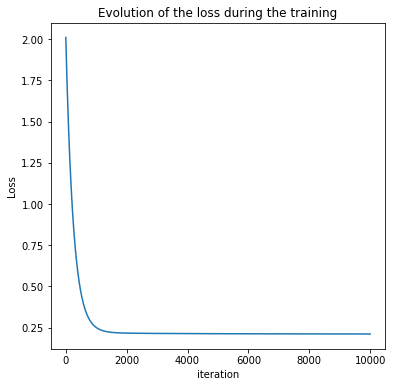

In [ ]:
def plot_loss(loss_list):
    plt.figure(figsize=(6, 6))
    step = np.arange(1, len(loss_list) + 1)
    plt.plot(step, loss_list)
    plt.title("Evolution of the loss during the training")
    plt.xlabel("iteration")
    plt.ylabel("Loss")
    plt.show()

plot_loss(loss)

In [ ]:
def predict(X, w):
  
    y_hat = X @ w
  
    return y_hat
    

In [ ]:
expected_value = predict(X_train, w)
print(expected_value)


[1.28583578 1.37751686 1.65672264 ... 1.22980284 1.48790299 1.35228815]


### K-Folding Stuff

In [ ]:
def k_fold_indices(num_examples: int, k: int = 4) -> List[Tuple[np.ndarray, np.ndarray]]:
    indices = np.arange(num_examples)
    split_size = num_examples // k
    val_indices = [indices[k * split_size : (k + 1) * split_size] for k in range(k)]
    both_indices = [(np.delete(indices, val_ind), val_ind) for val_ind in val_indices]
    return both_indices


In [ ]:
def cross_val_penalized_logistic_regression(X: np.ndarray,
                                            y: np.ndarray,
                                            lambd: float = 0,
                                            max_iters: int = 1001,
                                            lr: float = 0.5,
                                            loss_freq: int = 0,
                                            k: int = 4) -> float:
  
    val_accs = []

    for train_index, val_index in k_fold_indices(X.shape[0] , k):
        w, b, _ = train_penalized_logistic_regression(X[train_index], y[train_index], lambd, max_iters, lr, loss_freq)
        y_hat = logistic_output(X[val_index], w, b)
        val_accs.append(accuracy(y[val_index], classify(y_hat)))

    return np.mean(val_accs)

In [ ]:
mean_cv_acc = cross_val_penalized_logistic_regression(X_train, y_train)
print(f"Mean CV acc for default settings: {mean_cv_acc}")

NameError: name 'train_penalized_logistic_regression' is not defined

helpers.plot_loss(loss)- predict the collapse capacities of a building, given an earthquake, the data which is given to us: - metrics of ground mothing intensity

PGA(peak ground acceleration) does not take into account the dynamic response of building- so use Sa(T) (spectral acceleration)- describes what buildings with different periods will experience. =1000 ground motion of earthquakes.

Collapse capacity: value of the smallest spectral acceleration of a ground motion at the fundamental period of the structure which will cause the structure to collapse.

 w1 * (1.3) + w2*(da5_75) + w3*(da5_95) + w4*(fiv3) + w5*(sa_ratio) = sat1_col

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ad5b9508-4536-4617-b060-a55c942dfcf5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>